In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

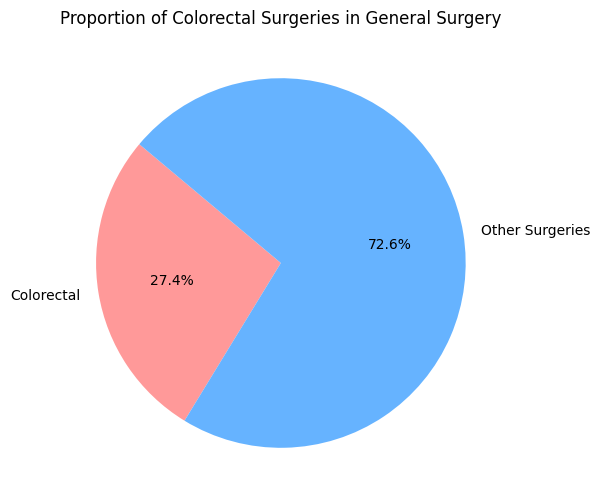

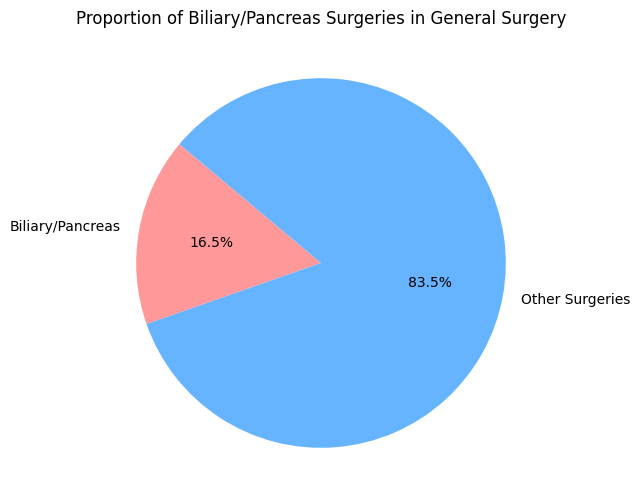

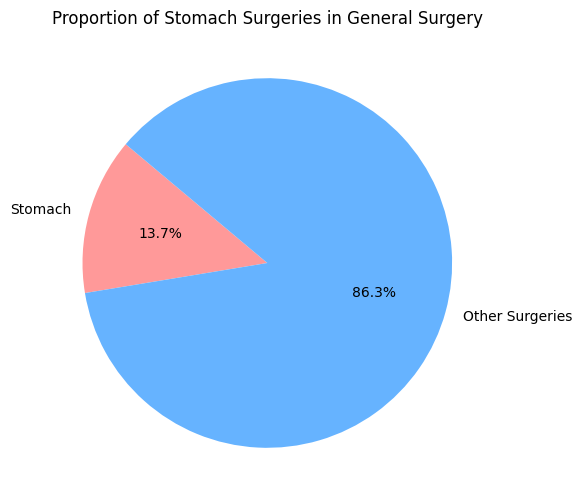

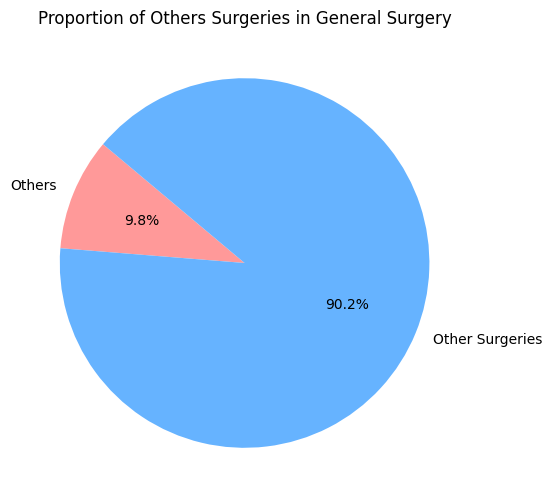

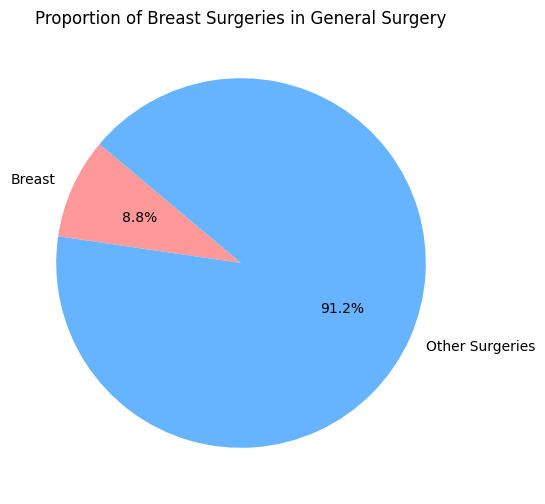

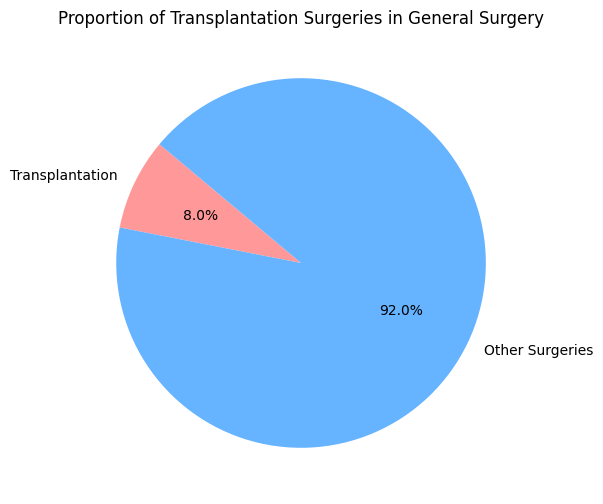

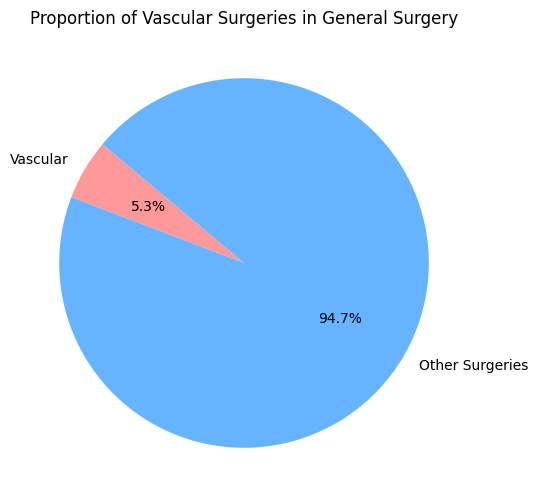

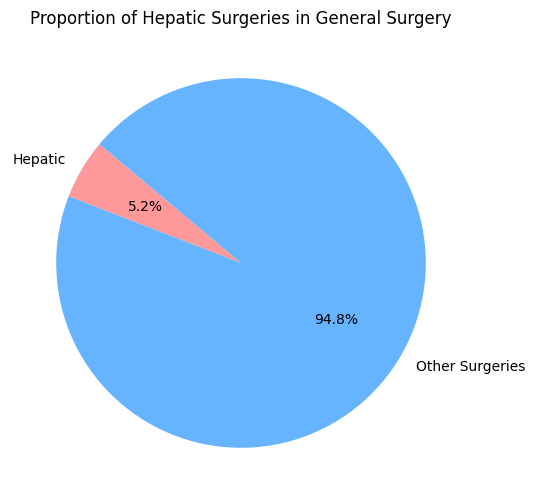

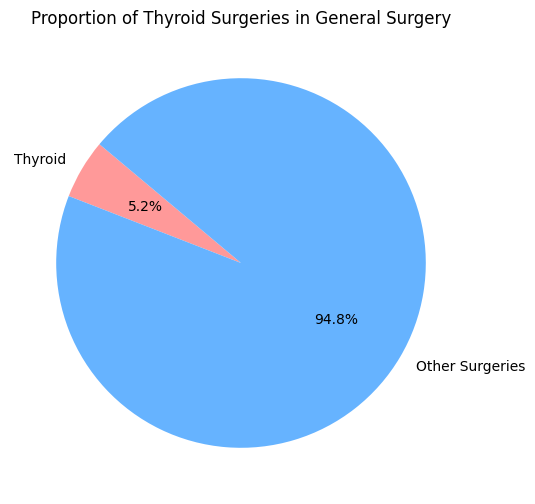

,caseid,subjectid,casestart,caseend,opstart,opend,adm,dis,age,sex,...,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,hosp_dur,op_dur
0,1,5955,0,11542,1668,10368,-236220,627780,77.0,M,...,0.0,100,70,0,10,0,0,0,14400,8700
1,2,2487,0,15741,1721,14621,-221160,1506840,54.0,M,...,0.0,0,100,0,20,0,0,0,28800,12900
2,3,2861,0,4394,1090,3010,-218640,40560,62.0,M,...,0.0,0,50,0,0,0,0,0,4320,1920
3,4,1903,0,20990,2522,17822,-201120,576480,74.0,M,...,0.0,100,100,0,50,0,0,0,12960,15300
4,5,4416,0,21531,2591,20291,-67560,3734040,66.0,M,...,0.0,0,160,0,10,900,0,2100,63360,17700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,3037,22641,-224040,812760,37.0,M,...,0.0,0,80,0,10,0,0,300,17280,19604
6383,6384,5583,0,15248,2140,14140,-215340,648660,64.0,M,...,0.0,0,90,0,20,0,0,0,14400,12000
6384,6385,2278,0,20643,2396,19496,-225600,1675200,69.0,M,...,0.0,0,100,0,25,30,0,300,31680,17100
6385,6386,4045,0,19451,3533,18233,-200460,836340,61.0,F,...,0.0,0,130,0,10,0,0,0,17280,14700


In [ ]:


# Count the number of surgeries for each optype
optype_counts = df_surgery['optype'].value_counts()

# Generate a pie chart for each optype
for optype, count in optype_counts.items():
    plt.figure(figsize=(6, 6))
    plt.pie([count, df_surgery.shape[0] - count], labels=[optype, 'Other Surgeries'],
            autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Proportion of {optype} Surgeries in General Surgery')
    plt.show()
df_surgery

In [40]:
df = pd.read_csv('/Users/andigonzalez/Desktop/DSC106/dsc106_finalproject/cases.csv')
df_surgery = df[df['department'].str.strip().str.lower() == 'general surgery'][['optype', 'dx', 'sex', 'age']]

df_surgeries_count = df_surgery.shape[0]

df_surgery = df_surgery[~df_surgery['optype'].isin(["Others", "Major resection", "Minor resection"])]

optype_counts = df_surgery['optype'].unique()
optype_counts

percentages = pd.DataFrame(columns=['surgery_name', 'pct_of_general', 'pct_cancer_indv', 
                                    'cancer_pct_women', 'cancer_pct_men'])

for i in optype_counts:
    df2 = df_surgery[df_surgery['optype'] == i]  # Filter for optype
    pct_of_general = df2.shape[0] / df_surgeries_count  # Percentage of total surgeries
    cancer = df2[df2['dx'].str.contains('cancer|carcinoma|adenocarcinoma', case=False, na=False)]
    pct_cancer_indv = cancer.shape[0] / df2.shape[0] if df2.shape[0] > 0 else 0

    cancer_women = cancer[cancer['sex'].str.lower().str.strip() == 'f']
    cancer_men = cancer[cancer['sex'].str.lower().str.strip() == 'm']
    cancer_pct_women = cancer_women.shape[0] / cancer.shape[0] if cancer.shape[0] > 0 else 0
    cancer_pct_men = cancer_men.shape[0] / cancer.shape[0] if cancer.shape[0] > 0 else 0

    percentages.loc[len(percentages)] = [i, pct_of_general, pct_cancer_indv, cancer_pct_women, cancer_pct_men]

percentages

percentages.to_csv('percentages.csv', index=False)

df_surgery

,optype,dx,sex,age
0,Colorectal,Rectal cancer,M,77.0
1,Stomach,Advanced gastric cancer,M,54.0
2,Biliary/Pancreas,Gallbladder stone,M,62.0
3,Stomach,Advanced gastric cancer,M,74.0
4,Vascular,Aortic aneurysm,M,66.0
...,...,...,...,...
6382,Transplantation,Chronic kidney disease,M,37.0
6383,Stomach,Advanced gastric cancer,M,64.0
6384,Colorectal,"Colon submucosal tumor, unknown behavior",M,69.0
6385,Stomach,Early gastric cancer,F,61.0


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cases.csv')

# Standardize column names
df.columns = df.columns.str.strip()

# Filter only "General Surgery" cases
df = df[df['department'].str.strip().str.lower() == 'general surgery']

# Extract relevant columns
df = df[['optype', 'diagnosis', 'sex']]

# Count total surgeries per optype
surgery_counts = df['optype'].value_counts().reset_index()
surgery_counts.columns = ['optype', 'total_surgeries']

# Identify cancer-related cases
cancer_keywords = ['cancer', 'carcinoma', 'adenocarcinoma']
df['cancer_case'] = df['diagnosis'].str.contains('|'.join(cancer_keywords), case=False, na=False)

# Count cancer cases per optype
cancer_counts = df[df['cancer_case']].groupby('optype').size().reset_index(name='cancer_cases')

# Count male/female cancer cases
gender_counts = df[df['cancer_case']].groupby(['optype', 'sex']).size().unstack(fill_value=0).reset_index()
gender_counts.columns = ['optype', 'male_cancer_cases', 'female_cancer_cases']

# Merge all data
merged_df = surgery_counts.merge(cancer_counts, on='optype', how='left').merge(gender_counts, on='optype', how='left')

# Fill NaN values with 0 (for optypes with no cancer cases)
merged_df.fillna(0, inplace=True)

# Save processed data
merged_df.to_csv('processed_data.csv', index=False)

# Display the cleaned data
import ace_tools as tools
tools.display_dataframe_to_user(name="Processed Surgery Data", dataframe=merged_df)
